The following solution are used to
1. Merge all the csv files and generate a consolidated dataset
2. As part of data cleansing, datatypes are set and null values are managed.

In [1]:
import pandas as pd

In [2]:
# merging csv files
dfDomesticVisitors = pd.concat(map(pd.read_csv, ['Challenge\domestic_visitors_2016.csv', 
                                 'Challenge\domestic_visitors_2017.csv',
                                 'Challenge\domestic_visitors_2018.csv',
                                 'Challenge\domestic_visitors_2019.csv']), ignore_index=True)

In [3]:
dfDomesticVisitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [4]:
# merging csv files
dfForeignVisitors = pd.concat(map(pd.read_csv, ['Challenge\\foreign_visitors_2016.csv', 
                                 'Challenge\\foreign_visitors_2017.csv',
                                 'Challenge\\foreign_visitors_2018.csv',
                                 'Challenge\\foreign_visitors_2019.csv']), ignore_index=True)

In [5]:
dfForeignVisitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [6]:
dfDomesticVisitors.describe()

,year
count,1512.00000
mean,2017.52381
std,1.12523
min,2016.00000
25%,2017.00000
50%,2018.00000
75%,2019.00000
max,2019.00000


In [7]:
dfDomesticVisitors.isna().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [8]:
dfDomesticVisitors["visitors"].fillna(0, inplace = True)

In [9]:
dfDomesticVisitors.loc[dfDomesticVisitors.visitors == ' ', 'visitors'] = '0'

In [10]:
dfDomesticVisitors['visitors'] = dfDomesticVisitors['visitors'].astype('int')

In [11]:
dfDomesticVisitors['visitors'].nlargest()

349     20703778
29      12032661
1133     9761776
805      8626250
804      6519850
Name: visitors, dtype: int32

In [12]:
dfDomesticVisitors

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [13]:
dfDomesticVisitors.to_csv('Challenge\domestic_visitors')

In [14]:
dfForeignVisitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [15]:
dfForeignVisitors['district'] = dfForeignVisitors['district'].astype('string')

In [16]:
dfForeignVisitors['month'] = dfForeignVisitors['month'].astype('string')

In [17]:
dfForeignVisitors.isna().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [18]:
dfForeignVisitors.loc[dfForeignVisitors.visitors == ' ', 'visitors'] = '0'

In [19]:
dfForeignVisitors['visitors'] = dfForeignVisitors['visitors'].astype('int')

In [20]:
dfForeignVisitors['date'] =  pd.to_datetime(dfForeignVisitors['date'], format='%d-%m-%Y') #01-01-2016

In [21]:
dfForeignVisitors.info

<bound method DataFrame.info of              district       date      month  year  visitors
0            Adilabad 2016-01-01    January  2016         2
1            Adilabad 2016-02-01   February  2016         0
2            Adilabad 2016-03-01      March  2016         2
3            Adilabad 2016-04-01      April  2016         0
4            Adilabad 2016-05-01        May  2016         0
...               ...        ...        ...   ...       ...
1507  Yadadri Bhongir 2019-08-01     August  2019         0
1508  Yadadri Bhongir 2019-09-01  September  2019         0
1509  Yadadri Bhongir 2019-10-01    October  2019         0
1510  Yadadri Bhongir 2019-11-01   November  2019         0
1511  Yadadri Bhongir 2019-12-01   December  2019         0

[1512 rows x 5 columns]>

In [22]:
dfForeignVisitors.to_csv('Challenge\\foreign_visitors')

In [23]:
dfForeignVisitors.head(1)

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2


In [24]:
dfDomesticVisitors.head(1)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136


In [25]:
dfDomesticVisitors.rename(columns = {'visitors':'domesticvisitors'}, inplace = True)

In [26]:
dfForeignVisitors.rename(columns = {'visitors':'foreignvisitors'}, inplace = True)

In [27]:
dfvisitors = dfDomesticVisitors[['district','date','month','year','domesticvisitors']]

In [28]:
dfvisitors['foreignvisitors'] = dfForeignVisitors[['foreignvisitors']]

In [29]:
dfvisitors['totalvisitors'] = dfvisitors[['foreignvisitors','domesticvisitors']].sum(axis=1)

In [30]:
dfvisitors.dtypes

district            object
date                object
month               object
year                 int64
domesticvisitors     int32
foreignvisitors      int32
totalvisitors        int64
dtype: object

In [31]:
dfvisitors.to_csv('Challenge\\visitors')

In [32]:
dfDomesticVisitors['district'].unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [33]:
dfDomesticVisitors.head(12)

,district,date,month,year,domesticvisitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
5,Adilabad,01-06-2016,June,2016,368237
6,Adilabad,01-07-2016,July,2016,447562
7,Adilabad,01-08-2016,August,2016,614285
8,Adilabad,01-09-2016,September,2016,491279
9,Adilabad,01-10-2016,October,2016,94184


<br>Question 1 : Top 10 Districts for Domestic Visitors </br>

In [34]:
dfTop10Districts=dfDomesticVisitors.groupby(dfDomesticVisitors.district)['domesticvisitors'].sum().sort_values(ascending=False).head(10).to_frame()


In [35]:
dfTop10Districts["Visitors (Mn)"] = dfTop10Districts["domesticvisitors"]/1000000

In [36]:
dfTop10Districts.drop('domesticvisitors', axis=1)

,Visitors (Mn)
district,
Hyderabad,83.900960
Rajanna Sircilla,41.763276
Warangal (Urban),30.726603
Yadadri Bhongir,26.893080
Bhadradri Kothagudem,21.600962
Medak,20.542639
Jayashankar Bhoopalpally,19.632865
Mahbubnagar,17.180118
Nirmal,13.315796


<AxesSubplot:ylabel='district'>

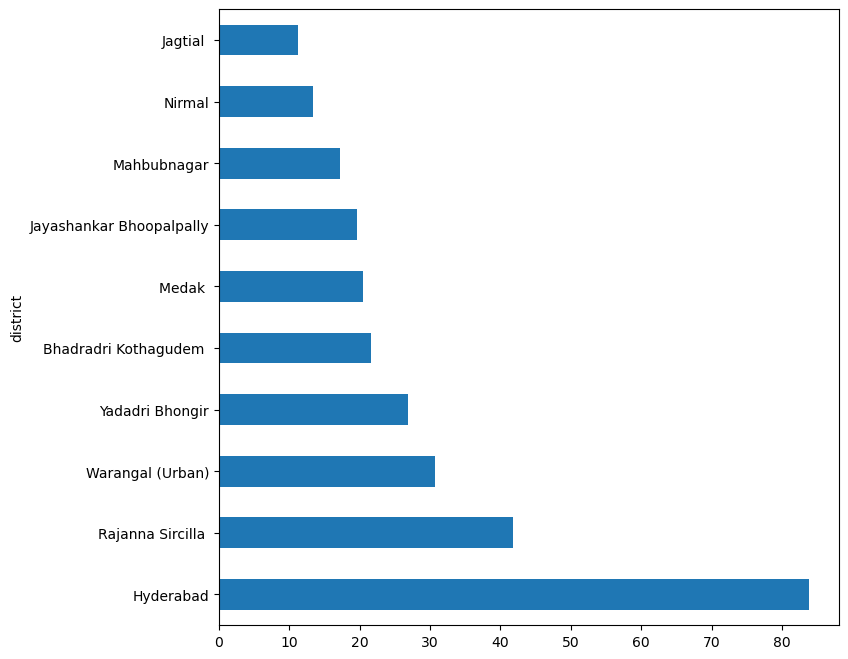

In [37]:
dfTop10Districts.plot(kind='barh', y='Visitors (Mn)',legend=False,figsize = (8,8),ylabel="No of Visitor (Millions)")

In [38]:
list(dfvisitors)

['district',
 'date',
 'month',
 'year',
 'domesticvisitors',
 'foreignvisitors',
 'totalvisitors']

In [39]:
dfDomesticVisitorsYoY = dfvisitors.groupby(['district', 'year'])['totalvisitors'].sum().reset_index()

In [40]:
dfvisitors.groupby('district')['domesticvisitors','foreignvisitors'].sum()

C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\4005436403.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfvisitors.groupby('district')['domesticvisitors','foreignvisitors'].sum()


,domesticvisitors,foreignvisitors
district,,
Adilabad,7321575,32
Bhadradri Kothagudem,21600962,0
Hyderabad,83900960,1044898
Jagtial,11303514,0
Jangaon,826280,2
Jayashankar Bhoopalpally,19632865,1252
Jogulamba Gadwal,6813340,945
Kamareddy,1773,0
Karimnagar,9462383,0


In [41]:
dfDomesticVisitorsYoY

,district,year,totalvisitors
0,Adilabad,2016,5075567
1,Adilabad,2017,825391
2,Adilabad,2018,644748
3,Adilabad,2019,775901
4,Bhadradri Kothagudem,2016,889030
...,...,...,...
121,Warangal (Urban),2019,1797680
122,Yadadri Bhongir,2016,1728600
123,Yadadri Bhongir,2017,7001728
124,Yadadri Bhongir,2018,13673378


In [42]:
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

In [43]:
dfCAGR = pd.DataFrame()
dfdummmy = pd.DataFrame()
dictdummy = {}
lstdummy = []
i2016 = 0
for district in dfDomesticVisitorsYoY['district'].unique():
    dfdummmy = dfDomesticVisitorsYoY[dfDomesticVisitorsYoY["district"]==district]
    dfdummmy.set_index("year",inplace=True)
    i2016 = 0
    i2017 = 0
    i2018 = 0
    i2019 = 0
    cagrper = 0
    if 2016 in dfdummmy.index:
        i2016 = dfdummmy.loc[2016,'totalvisitors']
    if 2017 in dfdummmy.index:
        i2017 = dfdummmy.loc[2017,'totalvisitors']
    if 2018 in dfdummmy.index:
        i2018 = dfdummmy.loc[2018,'totalvisitors']
    if 2019 in dfdummmy.index:
        i2019 = dfdummmy.loc[2019,'totalvisitors']

    if i2016 != 0:
        cagrper = round(((i2019/i2016)**(1/4)-1)*100,2)
    
    dictdummy = {
        "District" : district,
        "2016" : i2016,
        "2017" : i2017,
        "2018" : i2018,
        "2019" : i2019,
        "CAGR%" : cagrper
    }
    
    dfCAGR = dfCAGR.append(dictdummy,ignore_index=True)
    
dfCAGR.sort_values(by=['CAGR%'],ascending=False)

C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\577350879.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCAGR = dfCAGR.append(dictdummy,ignore_index=True)
C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\577350879.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCAGR = dfCAGR.append(dictdummy,ignore_index=True)
C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\577350879.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCAGR = dfCAGR.append(dictdummy,ignore_index=True)
C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\577350879.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCAGR = dfCAGR.append(dictdummy,ign

,District,2016,2017,2018,2019,CAGR%
13,Mancherial,7802,191626,398004,269820,142.50
30,Warangal (Rural),19400,144556,302012,353500,106.61
1,Bhadradri Kothagudem,889030,4094317,3799878,12817737,94.86
26,Siddipet,358400,1145721,1283300,2987864,69.92
4,Jangaon,40662,165708,291022,328890,68.64
23,Rajanna Sircilla,2176801,11919347,10834231,16832897,66.76
21,Nizamabad,6442,21951,41425,46334,63.76
25,Sangareddy,778000,2823450,2269900,4553160,55.54
22,Peddapalli,3244,14898,22254,16581,50.36
29,Wanaparthy,60138,244701,286600,298639,49.28


In [44]:
dfCAGR.to_csv('Challenge\\CAGR')

In [45]:
dfCAGR.dtypes

District     object
2016          int64
2017          int64
2018          int64
2019          int64
CAGR%       float64
dtype: object

In [46]:
dfHyderabad = dfvisitors[dfvisitors["district"]=='Hyderabad']
dfHyderabad

,district,date,month,year,domesticvisitors,foreignvisitors,totalvisitors
24,Hyderabad,01-01-2016,January,2016,1122510,15865,1138375
25,Hyderabad,01-02-2016,February,2016,778748,29646,808394
26,Hyderabad,01-03-2016,March,2016,1017794,13019,1030813
27,Hyderabad,01-04-2016,April,2016,1127738,8402,1136140
28,Hyderabad,01-05-2016,May,2016,1287181,8522,1295703
29,Hyderabad,01-06-2016,June,2016,12032661,10284,12042945
30,Hyderabad,01-07-2016,July,2016,1096754,17142,1113896
31,Hyderabad,01-08-2016,August,2016,1061137,12842,1073979
32,Hyderabad,01-09-2016,September,2016,832987,9397,842384
33,Hyderabad,01-10-2016,October,2016,901960,12808,914768


In [47]:
dfHyderabad.groupby("month")["totalvisitors"].sum().sort_values(ascending=False)

month
June         16965307
December      9458632
October       6650351
January       6558551
April         6187334
May           6109590
August        5834736
November      5719659
July          5633143
September     5406363
March         5303984
February      5118208
Name: totalvisitors, dtype: int64

In [48]:
dfRatioDtoF = dfvisitors.groupby('district')['domesticvisitors','foreignvisitors','totalvisitors'].sum()

C:\Users\ajesh\AppData\Local\Temp\ipykernel_10976\2700302397.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfRatioDtoF = dfvisitors.groupby('district')['domesticvisitors','foreignvisitors','totalvisitors'].sum()


In [49]:
dfRatioDtoF['%DomVisitors'] = round(dfRatioDtoF['domesticvisitors']/dfRatioDtoF['totalvisitors']*100,2)

In [50]:
dfRatioDtoF['%ForeignVisitors'] = round(dfRatioDtoF['foreignvisitors']/dfRatioDtoF['totalvisitors']*100,2)

In [51]:
dfRatioDtoF.sort_values(by=['%ForeignVisitors'], na_position='first',ascending=False)

,domesticvisitors,foreignvisitors,totalvisitors,%DomVisitors,%ForeignVisitors
district,,,,,
Medchal,0,0,0,NaN,NaN
Ranga Reddy,0,0,0,NaN,NaN
Suryapet,0,0,0,NaN,NaN
Vikarabad,0,0,0,NaN,NaN
Hyderabad,83900960,1044898,84945858,98.77,1.23
Warangal (Rural),819162,306,819468,99.96,0.04
Warangal (Urban),30726603,8821,30735424,99.97,0.03
Mulugu,1819800,575,1820375,99.97,0.03
Nagarkurnool,7424355,761,7425116,99.99,0.01


In [52]:
dfRatioDtoF

,domesticvisitors,foreignvisitors,totalvisitors,%DomVisitors,%ForeignVisitors
district,,,,,
Adilabad,7321575,32,7321607,100.00,0.00
Bhadradri Kothagudem,21600962,0,21600962,100.00,0.00
Hyderabad,83900960,1044898,84945858,98.77,1.23
Jagtial,11303514,0,11303514,100.00,0.00
Jangaon,826280,2,826282,100.00,0.00
Jayashankar Bhoopalpally,19632865,1252,19634117,99.99,0.01
Jogulamba Gadwal,6813340,945,6814285,99.99,0.01
Kamareddy,1773,0,1773,100.00,0.00
Karimnagar,9462383,0,9462383,100.00,0.00


In [53]:
dfpopulationdensity = pd.read_csv('Challenge\TelanganaPopulationDensity.csv')

In [54]:
dfpopulationdensity.dtypes
dfpopulationdensity

,District Name,Population
0,Adilabad,"7,08,972"
1,Bhadradri Kothagudem,"10,69,261"
2,Hyderabad,"39,43,323"
3,Jagitial,"9,85,417"
4,Jangaon,"5,66,376"
5,Jayashankar Bhupalpally,"4,16,763"
6,Jogulamba Gadwal,"6,09,990"
7,Kamareddy,"9,72,625"
8,Karimnagar,"10,05,711"
9,Khammam,"14,01,639"


In [55]:
dfpopulationdensity['District Name']=dfpopulationdensity['District Name'].astype('string')

In [56]:
dfpopulationdensity['Population'] = dfpopulationdensity['Population'].str.replace(',','')

In [57]:
dfpopulationdensity.rename(columns={"District Name": "district"},inplace=True)

In [61]:
dfpopulationdensity.shape

(33, 2)

In [62]:
dfRatioDtoF.shape

(33, 5)

In [65]:
dfRatioDtoF[["Population"]] = dfpopulationdensity[["Population"]].to_numpy()

In [100]:
dfRatioDtoF.to_csv('Challenge\PopulationtoTouristFootfall.csv')

In [68]:
dfRatioDtoF

,domesticvisitors,foreignvisitors,totalvisitors,%DomVisitors,%ForeignVisitors,Population
district,,,,,,
Adilabad,7321575,32,7321607,100.00,0.00,708972
Bhadradri Kothagudem,21600962,0,21600962,100.00,0.00,1069261
Hyderabad,83900960,1044898,84945858,98.77,1.23,3943323
Jagtial,11303514,0,11303514,100.00,0.00,985417
Jangaon,826280,2,826282,100.00,0.00,566376
Jayashankar Bhoopalpally,19632865,1252,19634117,99.99,0.01,416763
Jogulamba Gadwal,6813340,945,6814285,99.99,0.01,609990
Kamareddy,1773,0,1773,100.00,0.00,972625
Karimnagar,9462383,0,9462383,100.00,0.00,1005711


In [69]:
dfvisitors

,district,date,month,year,domesticvisitors,foreignvisitors,totalvisitors
0,Adilabad,01-01-2016,January,2016,792136,2,792138
1,Adilabad,01-02-2016,February,2016,937820,0,937820
2,Adilabad,01-03-2016,March,2016,582946,2,582948
3,Adilabad,01-04-2016,April,2016,341948,0,341948
4,Adilabad,01-05-2016,May,2016,252887,0,252887
...,...,...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010,0,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862,0,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860,0,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990,0,365990


In [75]:
dfRatioDtoF = dfvisitors[dfvisitors.year == 2019].pivot_table(values='totalvisitors', index='district' , aggfunc="sum")

In [76]:
dfRatioDtoF[["Population"]] = dfpopulationdensity[["Population"]].to_numpy()

In [88]:
dfRatioDtoF["PoptoTouRatio"] = round((dfRatioDtoF["totalvisitors"]/dfRatioDtoF["Population"])*100,2)

In [85]:
dfRatioDtoF.dtypes

totalvisitors      int64
Population         int32
PoptoTouRatio    float64
dtype: object

In [84]:
dfRatioDtoF['Population'] = dfRatioDtoF['Population'].astype('int')

In [99]:
dfRatioDtoF.sort_values(by="PoptoTouRatio",ascending=False)

,totalvisitors,Population,PoptoTouRatio
district,,,
Rajanna Sircilla,16832897,552037,3049.23
Bhadradri Kothagudem,12817737,1069261,1198.75
Medak,5452570,767428,710.50
Mulugu,1820375,257744,706.27
Yadadri Bhongir,4489374,739448,607.13
Nirmal,3816778,709418,538.02
Hyderabad,14121662,3943323,358.12
Jogulamba Gadwal,2008290,609990,329.23
Jagtial,3086115,985417,313.18


In [108]:
preddf = dfvisitors[dfvisitors.district == 'Hyderabad'].pivot_table(values='totalvisitors', index='year' , aggfunc="sum").reset_index()

In [111]:
yearlst = preddf["year"].tolist()
totalvisitorslst = preddf["totalvisitors"].tolist()

-5657788.5


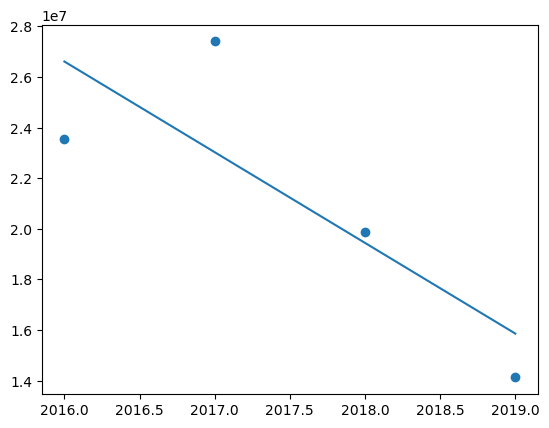

In [122]:
from scipy import stats
import matplotlib.pyplot as plt

preddf = dfvisitors[dfvisitors.district == 'Hyderabad'].pivot_table(values='totalvisitors', index='year' , aggfunc="sum").reset_index()
x = preddf["year"].tolist()
y = preddf["totalvisitors"].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

totalvisitor2025 = myfunc(2025)

print(totalvisitor2025)

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [126]:
preddf["totalvisitors"]/1000000

0    23.558336
1    27.407421
2    19.858439
3    14.121662
Name: totalvisitors, dtype: float64

In [114]:
yearlst

[2016, 2017, 2018, 2019]

In [115]:
totalvisitorslst

[23558336, 27407421, 19858439, 14121662]

In [125]:
intercept

7255790521.5

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

x = [2016, 2017, 2018, 2019] #years
y = [23558336, 27407421, 19858439, 14121662] #noofvisitors

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

totalvisitor2025 = myfunc(2025)

print(totalvisitor2025) #-5657788.5

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [128]:
-5657788.5/1000000

-5.6577885